## Breast Cancer Dataset

### Imports and Setup

In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

In [38]:
# check for CUDA availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


### Data Loading and Preprocessing

In [39]:
# load the breast cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target.reshape(-1, 1)

# split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# convert numpy arrays to torch tensors
X_train = torch.FloatTensor(X_train).to(device)
y_train = torch.FloatTensor(y_train).to(device)
X_test = torch.FloatTensor(X_test).to(device)
y_test = torch.FloatTensor(y_test).to(device)

### Define the Model

In [40]:
# define the neural network model
class NeuralNet(nn.Module):
    def __init__(self, input_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

# initialize the model
input_size = X_train.shape[1]
model = NeuralNet(input_size).to(device)

### Train the Model

In [41]:
# define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# lists to store training and validation metrics for plotting
train_losses = []
test_accuracies = []

# train the model
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # save training loss for plotting
    train_losses.append(loss.item())

    # evaluate on test set for plotting
    model.eval()
    with torch.no_grad():
        outputs_test = model(X_test)
        predicted = (outputs_test.round() == y_test).float().sum()
        accuracy_test = predicted / y_test.size(0)
        test_accuracies.append(accuracy_test.item())
    model.train()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Test Accuracy: {accuracy_test.item()*100:.2f}%')

Epoch [10/100], Loss: 0.5398, Test Accuracy: 92.11%
Epoch [20/100], Loss: 0.4280, Test Accuracy: 95.61%
Epoch [30/100], Loss: 0.3409, Test Accuracy: 96.49%
Epoch [40/100], Loss: 0.2740, Test Accuracy: 96.49%
Epoch [50/100], Loss: 0.2245, Test Accuracy: 96.49%
Epoch [60/100], Loss: 0.1887, Test Accuracy: 96.49%
Epoch [70/100], Loss: 0.1627, Test Accuracy: 96.49%
Epoch [80/100], Loss: 0.1435, Test Accuracy: 97.37%
Epoch [90/100], Loss: 0.1289, Test Accuracy: 97.37%
Epoch [100/100], Loss: 0.1174, Test Accuracy: 97.37%


### Evaluation Metrics

In [42]:
# evaluation on test set with all metrics
model.eval()
with torch.no_grad():
    outputs_test = model(X_test)
    predicted_labels = outputs_test.round()
    
    # move tensors to CPU for scikit-learn
    y_test_cpu = y_test.cpu().numpy()
    predicted_labels_cpu = predicted_labels.cpu().numpy()

    accuracy = accuracy_score(y_test_cpu, predicted_labels_cpu)
    precision = precision_score(y_test_cpu, predicted_labels_cpu)
    recall = recall_score(y_test_cpu, predicted_labels_cpu)
    f1 = f1_score(y_test_cpu, predicted_labels_cpu)

    print("\nFinal Evaluation Metrics on Test Data:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")


Final Evaluation Metrics on Test Data:
Accuracy: 97.37%
Precision: 0.9857
Recall: 0.9718
F1-Score: 0.9787


### Plotting Training-Validation Plots

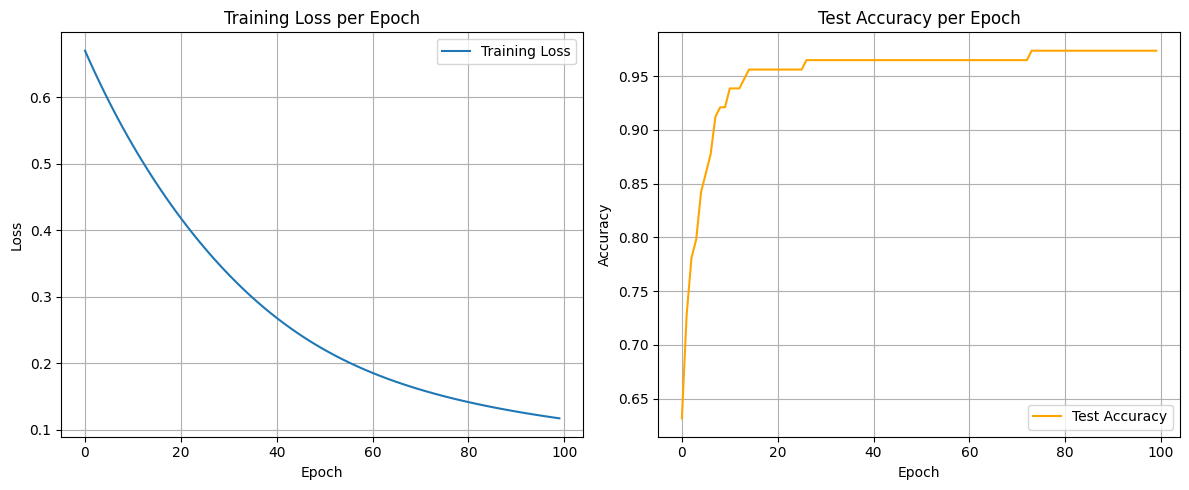

In [43]:
# plot the training loss and test accuracy over epochs
plt.figure(figsize=(12, 5))

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Test Accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy', color='orange')
plt.title('Test Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Iris Dataset

### Data Loading and Preprocessing

In [44]:
from sklearn.datasets import load_iris

In [45]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert numpy arrays to torch tensors
X_train = torch.FloatTensor(X_train).to(device)
y_train = torch.LongTensor(y_train).to(device)
X_test = torch.FloatTensor(X_test).to(device)
y_test = torch.LongTensor(y_test).to(device)

### Define the Model

In [46]:
# Define the neural network model for multi-class classification
class NeuralNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, num_classes)
        self.log_softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.log_softmax(out)
        return out

# Initialize the model
input_size = X_train.shape[1]
num_classes = len(np.unique(y_train.cpu()))
model = NeuralNet(input_size, num_classes).to(device)

### Train the Model

In [47]:
# Define the loss function and optimizer
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store training and validation metrics for plotting
train_losses = []
test_accuracies = []

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Save training loss for plotting
    train_losses.append(loss.item())

    # Evaluate on test set for plotting
    model.eval()
    with torch.no_grad():
        outputs_test = model(X_test)
        _, predicted_labels = torch.max(outputs_test.data, 1)
        correct = (predicted_labels == y_test).sum().item()
        accuracy_test = correct / y_test.size(0)
        test_accuracies.append(accuracy_test)
    model.train()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Test Accuracy: {accuracy_test*100:.2f}%')

Epoch [10/100], Loss: 0.9499, Test Accuracy: 93.33%
Epoch [20/100], Loss: 0.8143, Test Accuracy: 96.67%
Epoch [30/100], Loss: 0.7028, Test Accuracy: 93.33%
Epoch [40/100], Loss: 0.6131, Test Accuracy: 90.00%
Epoch [50/100], Loss: 0.5419, Test Accuracy: 90.00%
Epoch [60/100], Loss: 0.4857, Test Accuracy: 93.33%
Epoch [70/100], Loss: 0.4406, Test Accuracy: 93.33%
Epoch [80/100], Loss: 0.4040, Test Accuracy: 93.33%
Epoch [90/100], Loss: 0.3733, Test Accuracy: 93.33%
Epoch [100/100], Loss: 0.3469, Test Accuracy: 96.67%


### Evaluation Metrics

In [48]:
# Evaluation on test set with all metrics
model.eval()
with torch.no_grad():
    outputs_test = model(X_test)
    _, predicted_labels = torch.max(outputs_test.data, 1)

    # Move tensors to CPU for scikit-learn
    y_test_cpu = y_test.cpu().numpy()
    predicted_labels_cpu = predicted_labels.cpu().numpy()

    accuracy = accuracy_score(y_test_cpu, predicted_labels_cpu)
    precision = precision_score(y_test_cpu, predicted_labels_cpu, average='weighted', zero_division=0)
    recall = recall_score(y_test_cpu, predicted_labels_cpu, average='weighted', zero_division=0)
    f1 = f1_score(y_test_cpu, predicted_labels_cpu, average='weighted', zero_division=0)

    print("\nFinal Evaluation Metrics on Test Data:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")


Final Evaluation Metrics on Test Data:
Accuracy: 96.67%
Precision: 0.9694
Recall: 0.9667
F1-Score: 0.9664


### Plotting Training-Validation Plots

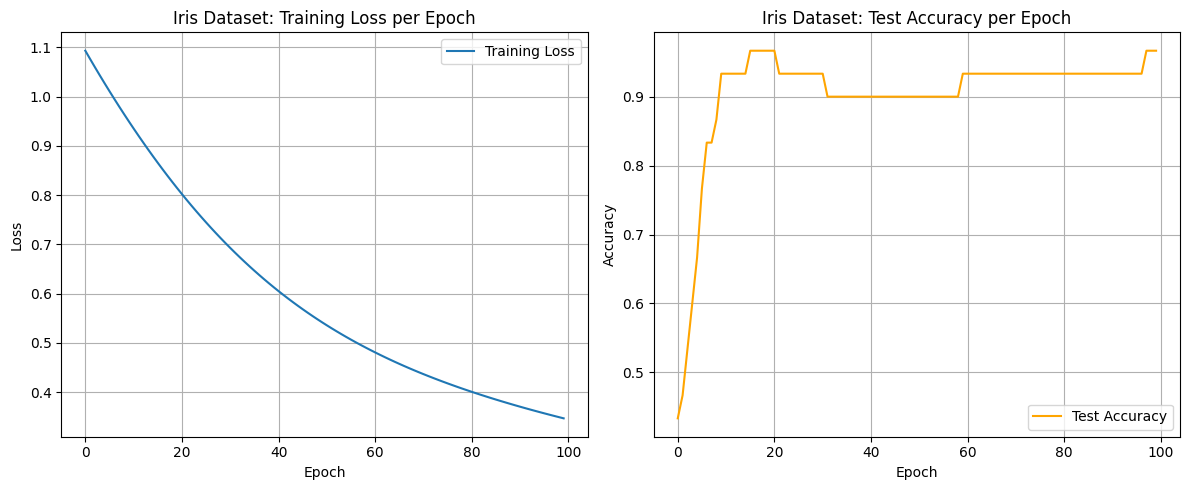

In [49]:
# Plot the training loss and test accuracy over epochs
plt.figure(figsize=(12, 5))

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Iris Dataset: Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Test Accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy', color='orange')
plt.title('Iris Dataset: Test Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()